## Wine Quality Prediction Analysis

### Dataset Information
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced(e.g. there are much more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

Attribute Information:
Input variables (based on physiochemical tests):
1. - fixed acidity
2. - volatile acidity
3. - citric acid
4. - residual sugar
5. - chlorides
6. - free sulfur dioxide
7. - total sulfur dioxide
8. - density
9. - pH
10. - sulphates
11. - alcohol        
Output variable (based on sensory data): 
12. - quality(score between 0 and 10)

### Work Flow
Data collection ---> Data preprocessing ---> Data Analysis ---> Model Preparation ---> Model Evaluation

##### Import Modules

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection

In [18]:
# load the dataset
winequality = pd.read_csv('winequalityN.csv')
print(winequality.shape)
winequality.head()

(6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


There are 6,497 rows and 13 columns in the wine quality dataset.

### Data Preprocessing

In [3]:
# get some information about the dataset
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


There are 11 floating point columns, 1 interger datatype column and 1 object datatype column. There seem to be some missing values, let's check

In [4]:
# check for missing values
winequality.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

There are 10 missing values for 'fixed acidity', 9 for 'pH', 8 for 'volatile acidity', 4 for 'sulphates', 3 for 'citric acid' and 2 for 'residual sugar' and 'chlorides'. Let's fill them up

In [19]:
# fill in the missing values with the mean value 
for col, value in winequality.items():
    if col != 'type':
        winequality[col] = winequality[col].fillna(winequality[col].mean())

In [6]:
# recheck for missing values
winequality.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No more missing values. Let's perform some analysis 

### Data Analysis

###### perform some statistical analysis on the dataset

In [7]:
# checking statistical information about the dataframe
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
# checking the types of wine present
winequality['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In out dataset, the wine has been categorized into white and red wine with respective data point 4898 and 1599. Thus the white exceeds the red

In [9]:
# checking the quality grading of wine
winequality['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

The quality grading system is from 3 to 9

In [10]:
# calculate teh correlation matrix
correlation_matrix = winequality.corr()

# set the threshold for correlation
correlation_threshold = 0.5

Now, our dataset is quite large, let's find correlation between features to minimize the workload.

In [26]:
# find highly correlated features with wine quality
highly_correlated_features = np.abs(correlation_matrix['quality']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Wine Quality: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Wine Quality: 
quality: 1.00


No independent feature correlates highly with the wine quality.

In [11]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
residual sugar - density: 0.55
free sulfur dioxide - total sulfur dioxide: 0.72
total sulfur dioxide - free sulfur dioxide: 0.72
density - residual sugar: 0.55
density - alcohol: -0.69
alcohol - density: -0.69


There's positive correlation between residual sugar and density, therefore, the more residual sugar, the denser the wine. There's negative correlation between density and alcohol, therefore, the more the alcohol, the less dense the wine.

###### perform data visualizations

In [12]:
# set the background of graphs
sns.set()

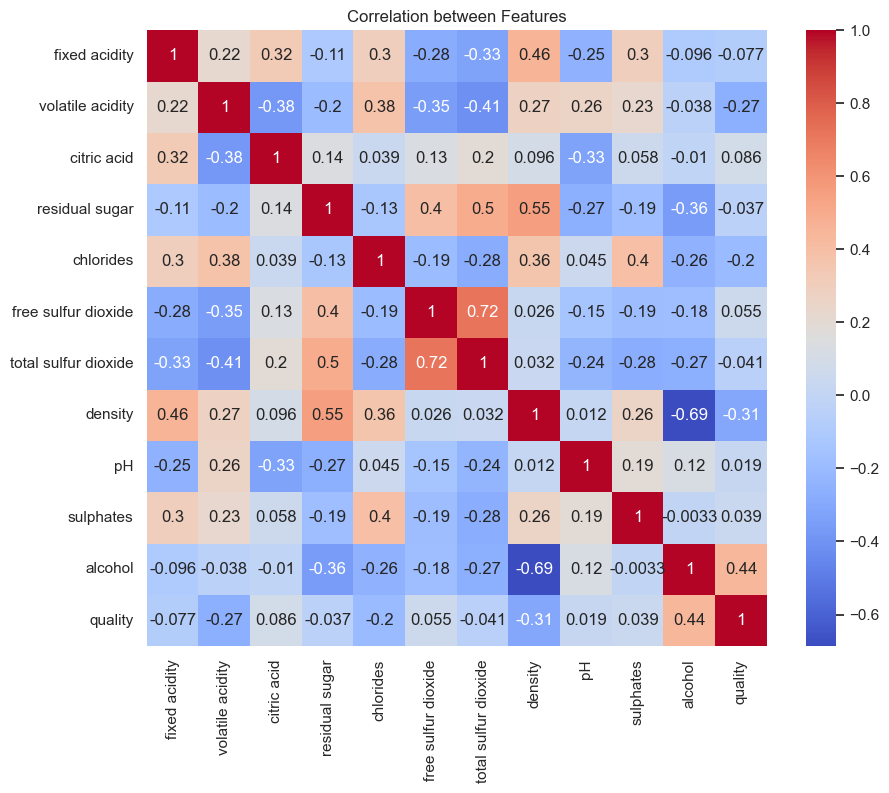

In [13]:
# visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(winequality.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

This is a graphical representation of correlation.

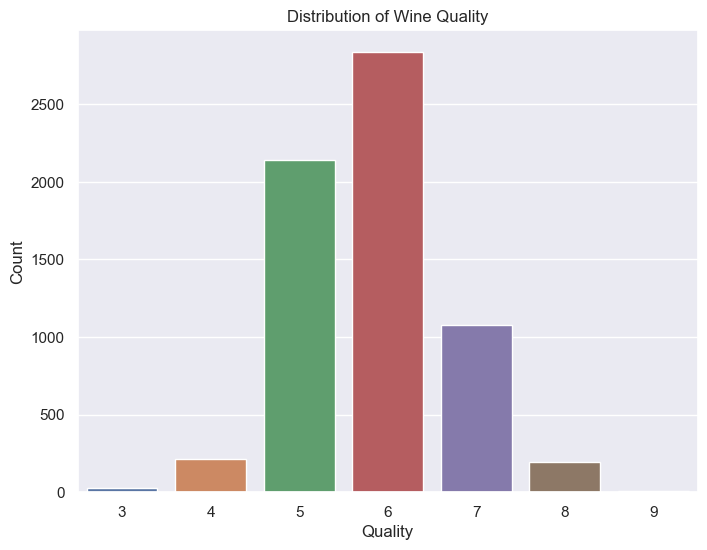

In [14]:
# visualize the distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=winequality)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

We notice from the above graph that majority of the wine present in our dataset have a quality grade of 6, with few having 3, and very few having 5.

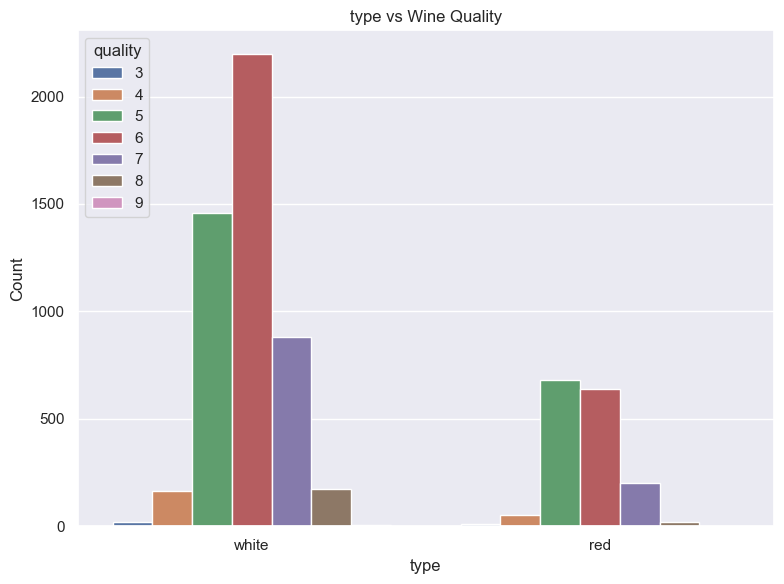

In [15]:
# bar plots for categorical features
categorical_features = winequality.select_dtypes(include=['object']).columns
plt.figure(figsize=(8, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(x=feature, hue='quality', data=winequality)
    plt.title(f"{feature} vs Wine Quality")
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

More proportions of the white wine, have a grade 6 quality while that of the red wine lies between 5 and 6 with grade 5 leading. We have more quality white wine present as compared red wine.

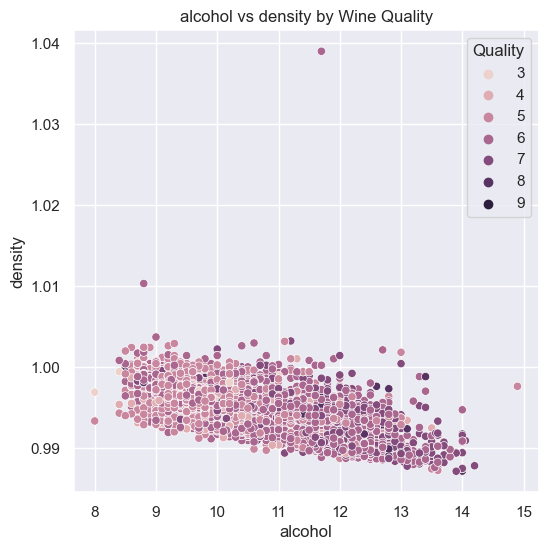

In [29]:
# set the highly correlated features
feature1 = 'alcohol'
feature2 = 'density'

# plot the relationship between the features and quality
plt.figure(figsize=(6, 6))
sns.scatterplot(x=feature1, y=feature2, hue='quality', data=winequality)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"{feature1} vs {feature2} by Wine Quality")
plt.legend(title='Quality')
plt.show()

From the scatter plot, as the points regress from 11 to 14 on the graph, the more the dark spots. We can infer that, the lower the density and the higher the alcohol, in a very small way, the more the quality of the wine.

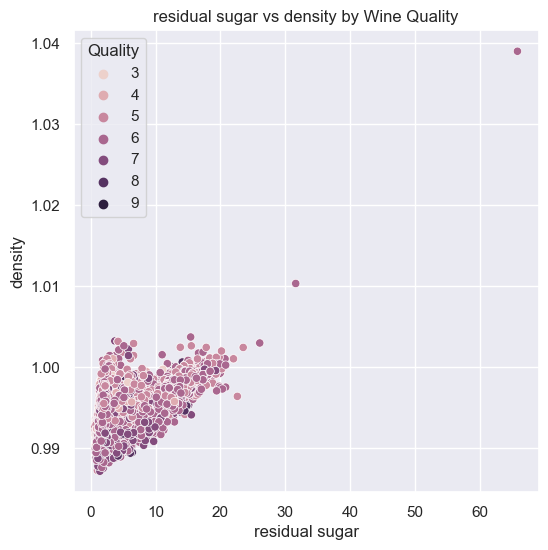

In [28]:
# set the highly correlated features
feature1 = 'residual sugar'
feature2 = 'density'

# plot the relationship between the features and quality
plt.figure(figsize=(6, 6))
sns.scatterplot(x=feature1, y=feature2, hue='quality', data=winequality)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"{feature1} vs {feature2} by Wine Quality")
plt.legend(title='Quality')
plt.show()

From the above scatter plot, we can infer that the less the residual sugar, the less the density, and the more the darker spots indicating quality wine.

In [17]:
# encode the categorical column
from sklearn.preprocessing import LabelEncoder

# create an instance of Lavel encoder
label_encoder = LabelEncoder()

# encode the type coloumn
winequality['type_encoded'] = label_encoder.fit_transform(winequality['type'])

# print the encoded values
print(winequality[['type', 'type_encoded']].head())

    type  type_encoded
0  white             1
1  white             1
2  white             1
3  white             1
4  white             1


Encoding our categorical column of 'type'

### Model Preparations

In [18]:
# import libraries for machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# feature engineering: create new features if desired
winequality['total_acidity'] = winequality['fixed acidity'] + winequality['volatile acidity']
winequality = winequality.drop(['fixed acidity', 'volatile acidity'], axis=1)

The fixed acidity and volatile acidity can be added to produce a new feature called total_acidity

#### Train Test Split

In [20]:
# split data into features and target variable
X = winequality.drop(['quality', 'type'], axis=1)
y = winequality['quality']

In [21]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### model creation and training

In [22]:
# create and fit the random forest regressor algorithm model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

###### prediction and model evaluation

In [23]:
# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

###### checking accuracy

In [24]:
# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.3305620769230769
R-squared (R2) Score: 0.5375456763224838


So from my wine quality analysis notebook, this was the model with the best scores for teh mean squared error and the r2 score

##### Some notes on R2 score
The R-squared (R2) score, also known as the coefficient of determination, is a statistical measure used to evaluate the goodness of fit of a regression model. It provides an indication of how well the model fits the observed data.

The R2 score is a value between 0 and 1, where:

R2 = 0 implies that the model does not explain any of the variance in the target variable.
R2 = 1 indicates that the model perfectly predicts the target variable.
Here's how you can interpret the R2 score:

1. R2 represents the proportion of the variance in the target variable that can be explained by the independent variables included in the model.
2. An R2 score of 1 means that the model captures all the variance in the target variable and perfectly predicts the observed values.
3. An R2 score of 0 indicates that the model fails to explain any of the variance in the target variable.
4. R2 can also take negative values if the model performs worse than a simple average of the target variable. This occurs when the model has a large amount of unexplained variance.
5. Higher R2 scores generally indicate a better fit of the model to the data, as it suggests that a larger proportion of the variance in the target variable is explained by the independent variables.
6. R2 is a relative measure and should be interpreted within the context of the specific problem and the domain. The interpretation of a "good" R2 score may vary depending on the field of study and the nature of the problem being addressed.
7. R2 should not be used in isolation as the sole metric for model evaluation. It is important to consider other evaluation metrics and domain-specific knowledge when assessing the overall performance of a model.

In summary, the R2 score provides a measure of how well the regression model fits the observed data, with values closer to 1 indicating a better fit. However, it is important to consider other factors and evaluation metrics when assessing the overall performance and usefulness of the model.

##### Mean Squared Error
The mean squared error (MSE) is a common metric used to evaluate the performance of a regression model. It measures the average squared difference between the predicted values and the actual values.

Mathematically, MSE is calculated by taking the average of the squared differences between the predicted values (ŷ) and the actual values (y) for each data point:

MSE = (1/n) * Σ(y - ŷ)^2

Here's how you can interpret the MSE:

1. The MSE value is always non-negative. A value of 0 indicates a perfect prediction, where the predicted values match the actual values exactly.
2. The larger the MSE value, the greater the average squared difference between the predicted and actual values. In other words, a higher MSE indicates a larger overall error in the model's predictions.
3. Since MSE is calculated by squaring the differences, it penalizes larger errors more heavily than smaller errors. This means that outliers or large errors have a significant impact on the MSE value.
4. MSE is in the squared unit of the target variable. For example, if you are predicting house prices in dollars, the MSE will be in square dollars.
5. MSE can be compared between different models or variations of the same model. A lower MSE indicates better model performance, as it signifies smaller average prediction errors.

It's important to note that the interpretation of MSE depends on the context and the specific problem you are working on. While MSE provides a useful measure of overall prediction accuracy, it may not capture all aspects of model performance. It is often used in combination with other evaluation metrics to gain a more comprehensive understanding of the model's performance.

### Unsupervised Learning

In [2]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# load the dataset
winequality = pd.read_csv('winequalityN.csv')

###### k-means clustering

In [4]:
# select the features for clustering
features = ['alcohol', 'density']

In [5]:
# extract the feature values
X = winequality[features]

In [6]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# perform k-means clustering
k = 5     # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# add the cluster labels to the dataset
winequality['cluster'] = clusters

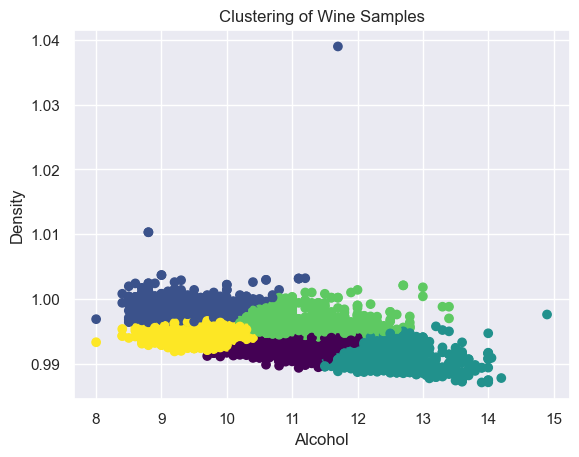

In [9]:
# visualize the clusters
sns.set()
plt.scatter(winequality['alcohol'], winequality['density'], c=winequality['cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('Clustering of Wine Samples')
plt.show()

###### Fuzzy c-clustering

In [18]:
pip install scikit-fuzzy

     ------------------------------------ 994.0/994.0 kB 723.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=be2b306cc9a93c7b2a2832e555be431b6169abbcd32bb2d25207214ec1a035b6
  Stored in directory: c:\users\ekow\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install scikit-learn-extra

     ------------------------------------ 346.2/346.2 kB 294.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

In [11]:
# select features for clustering
features = ['alcohol', 'density', 'volatile acidity']

# Extract the feature values
X = winequality[features]

X.loc[X['volatile acidity'].isnull(), 'volatile acidity'] = X['volatile acidity'].mean()

C:\Users\EKOW\AppData\Local\Temp\ipykernel_8932\1503712309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X['volatile acidity'].isnull(), 'volatile acidity'] = X['volatile acidity'].mean()


In [12]:
X.isnull().sum()

alcohol             0
density             0
volatile acidity    0
dtype: int64

In [13]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# perform fuzzy c-means clustering
k = 3  # number of clusters
fcm = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
fcm.fit(X_scaled)

# get the cluster labels
clusters = fcm.predict(X_scaled)
                      
# compute the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)

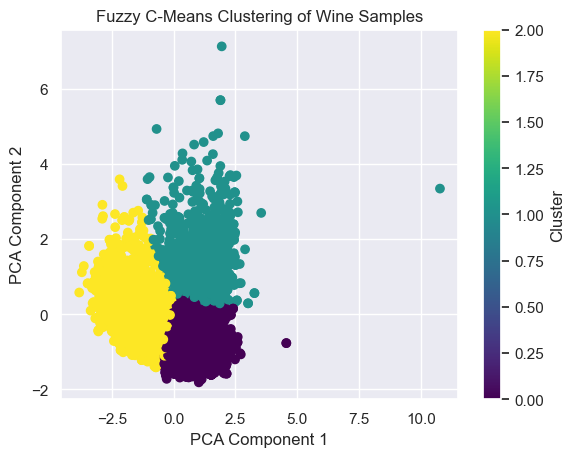

Silhouette Score: 39.18755550549927


In [14]:
# plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Fuzzy C-Means Clustering of Wine Samples')
plt.colorbar(label='Cluster')
plt.show()

print(f"Silhouette Score: {silhouette_avg*100}")

###### hierarchical clustering

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
# Select the features for clustering
features = ['alcohol', 'density', 'volatile acidity']

# Extract the feature values
X = winequality[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

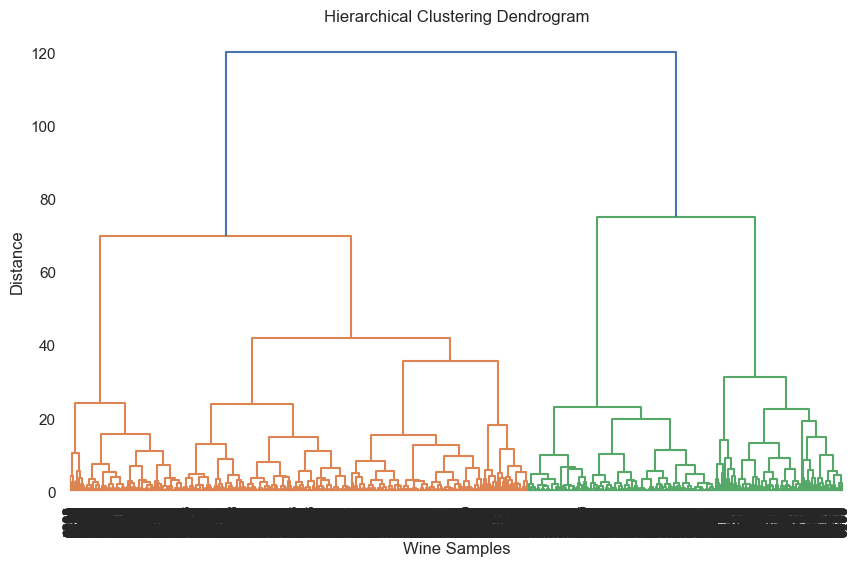

In [21]:
# perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

# plot the dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix, labels=winequality.index, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Wine Samples')
plt.ylabel('Distance')
plt.show()

In [22]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 505.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


###### association rule mining

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

In [26]:
# Select the features for association rule mining
features = ['type', 'alcohol', 'volatile acidity', 'quality']

# Extract the selected features
selected_data = winequality[features]

# convert categorical features to string type
selected_data['type'] = selected_data['type'].astype(str)
selected_data['quality'] = selected_data['quality'].astype(str)

C:\Users\EKOW\AppData\Local\Temp\ipykernel_8932\2985576985.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['type'] = selected_data['type'].astype(str)
C:\Users\EKOW\AppData\Local\Temp\ipykernel_8932\2985576985.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['quality'] = selected_data['quality'].astype(str)


In [27]:
selected_data.isnull().sum()

type                0
alcohol             0
volatile acidity    0
quality             0
dtype: int64

In [29]:
# apply one-hot encoding to categorical features
encoded_data = pd.get_dummies(selected_data)

In [31]:
encoded_data.dtypes

alcohol             float64
volatile acidity    float64
type_red              uint8
type_white            uint8
quality_3             uint8
quality_4             uint8
quality_5             uint8
quality_6             uint8
quality_7             uint8
quality_8             uint8
quality_9             uint8
dtype: object

In [32]:
encoded_data.head()

,alcohol,volatile acidity,type_red,type_white,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9
0,8.8,0.27,0,1,0,0,0,1,0,0,0
1,9.5,0.30,0,1,0,0,0,1,0,0,0
2,10.1,0.28,0,1,0,0,0,1,0,0,0
3,9.9,0.23,0,1,0,0,0,1,0,0,0
4,9.9,0.23,0,1,0,0,0,1,0,0,0


In [40]:
# Select the features for association rule mining
features = ['alcohol', 'type', 'quality', 'volatile acidity']

# Extract the selected features
selected_data = winequality[features]

# convert categorical features to string type
selected_data['type'] = selected_data['type'].astype(str)
selected_data['quality'] = selected_data['quality'].astype(str)

# Binning the 'alcohol' column into 3 categories
selected_data['alcohol_bin'] = pd.cut(selected_data['alcohol'], bins=3, labels=['low', 'medium', 'high'])

# Binning the 'volatile acidity' column into 3 categories
selected_data['volatile_acidity_bin'] = pd.cut(selected_data['volatile acidity'], bins=3, labels=['low', 'medium', 'high'])

# Drop the original 'alcohol' and 'volatile acidity' columns
selected_data.drop(['alcohol', 'volatile acidity'], axis=1, inplace=True)

# apply one-hot encoding to categorical features
encoded_data = pd.get_dummies(selected_data)

# perform frequent itemset mining using Apriori algorithm
frequent_itemsets = apriori(encoded_data, min_support=0.05, use_colnames=True)

# generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

# print the generated association rules
print(rules)

C:\Users\EKOW\AppData\Local\Temp\ipykernel_8932\3363046151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['type'] = selected_data['type'].astype(str)
C:\Users\EKOW\AppData\Local\Temp\ipykernel_8932\3363046151.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['quality'] = selected_data['quality'].astype(str)
C:\Users\EKOW\AppData\Local\Temp\ipykernel_8932\3363046151.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

                                          antecedents  \
0                                          (type_red)   
1                       (volatile_acidity_bin_medium)   
2                                         (quality_5)   
3                                         (quality_6)   
4                                         (quality_7)   
..                                                ...   
72  (quality_7, type_white, volatile_acidity_bin_low)   
73        (quality_7, type_white, alcohol_bin_medium)   
74  (quality_7, volatile_acidity_bin_low, alcohol_...   
75                            (quality_7, type_white)   
76                    (quality_7, alcohol_bin_medium)   

                                       consequents  antecedent support  \
0                       (volatile_acidity_bin_low)            0.246114   
1                                       (type_red)            0.102201   
2                                     (type_white)            0.329075   
3                  